In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
#Дані для регресії -

X_reg, y_reg = make_regression(
    n_samples=3000,
    n_features=1,
    noise=20,
    random_state=42
)

In [4]:
# --- Дані для класифікації ---
X_clf, y_clf = make_classification(
    n_samples=3000,
    n_features=4,           # збільшимо кількість ознак
    n_classes=5,
    n_informative=3,        # принаймні 3, щоб 2**3 = 8 ≥ 5 класів
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)


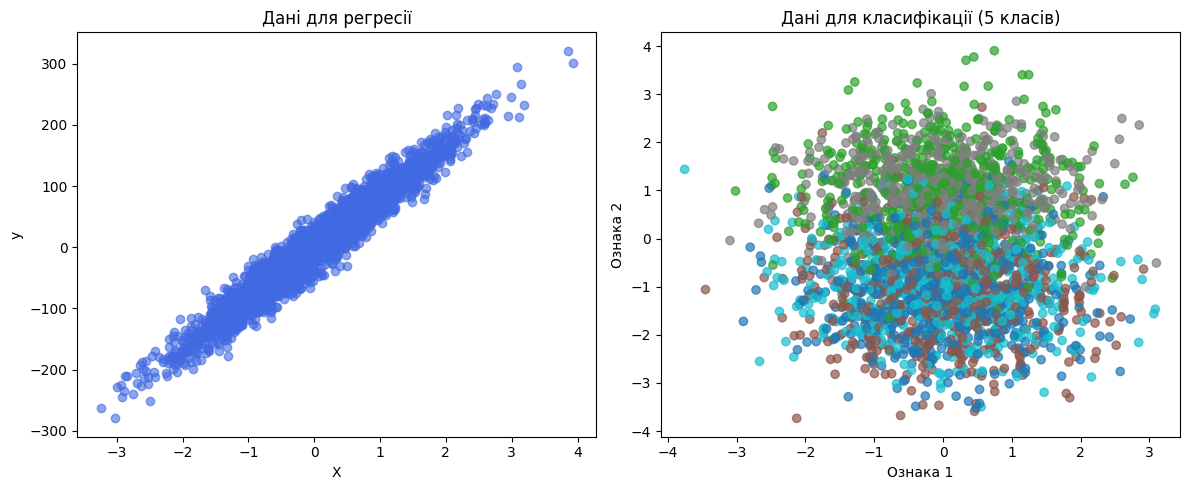

In [6]:
# --- Візуалізація ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_reg, y_reg, color='royalblue', alpha=0.6)
plt.title("Дані для регресії")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(1,2,2)
plt.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap='tab10', alpha=0.7)
plt.title("Дані для класифікації (5 класів)")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")

plt.tight_layout()
plt.show()

In [7]:
# =====================================
# 3. Підготовка даних для моделей
# =====================================

# --- Розбиття регресійних даних ---
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# --- Розбиття даних для класифікації ---
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
📉 Mean Squared Error (MSE): 389.66


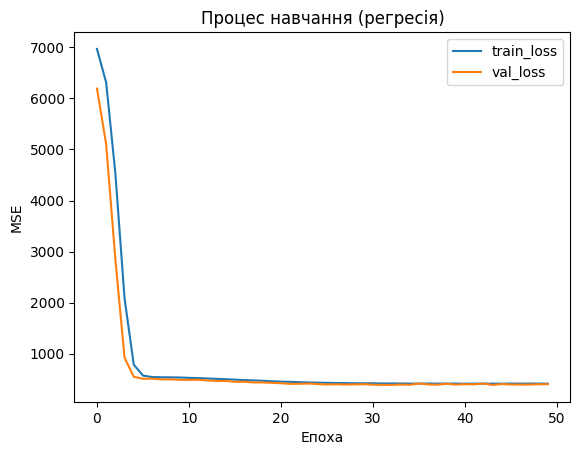

In [8]:
# =====================================
# 4. Модель для регресії
# =====================================

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse')

history_reg = model_reg.fit(Xr_train, yr_train, validation_split=0.2, epochs=50, verbose=0)

# --- Оцінка ---
y_pred_reg = model_reg.predict(Xr_test)
mse = mean_squared_error(yr_test, y_pred_reg)
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")

# --- Графік навчання ---
plt.plot(history_reg.history['loss'], label='train_loss')
plt.plot(history_reg.history['val_loss'], label='val_loss')
plt.title('Процес навчання (регресія)')
plt.xlabel('Епоха')
plt.ylabel('MSE')
plt.legend()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ Accuracy: 0.880


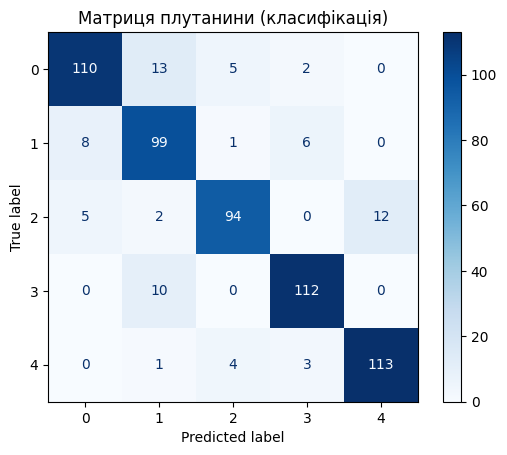

In [10]:
# =====================================
# 5. Модель для класифікації (оновлено)
# =====================================

model_clf = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(4,)),  # <-- виправлено тут
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_clf = model_clf.fit(Xc_train, yc_train, validation_split=0.2, epochs=50, verbose=0)

# --- Оцінка ---
y_pred_clf = np.argmax(model_clf.predict(Xc_test), axis=1)
acc = accuracy_score(yc_test, y_pred_clf)
print(f"✅ Accuracy: {acc:.3f}")

# --- Матриця плутанини ---
cm = confusion_matrix(yc_test, y_pred_clf)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Матриця плутанини (класифікація)')
plt.show()


In [11]:
# =====================================
# 6. Висновки
# =====================================

print("""
🔹 У задачі регресії нейронна мережа навчилася відтворювати лінійну залежність із певною похибкою.
    Значення MSE показує рівень відхилення прогнозу від реальних даних.

🔹 У задачі класифікації модель досягла певного рівня точності (Accuracy),
    що показує здатність мережі правильно розрізняти 5 класів.

✅ Обидві моделі продемонстрували коректну роботу, але точність можна покращити
    збільшенням кількості нейронів, епох або застосуванням нормалізації даних.
""")



🔹 У задачі регресії нейронна мережа навчилася відтворювати лінійну залежність із певною похибкою.
    Значення MSE показує рівень відхилення прогнозу від реальних даних.

🔹 У задачі класифікації модель досягла певного рівня точності (Accuracy),
    що показує здатність мережі правильно розрізняти 5 класів.

✅ Обидві моделі продемонстрували коректну роботу, але точність можна покращити
    збільшенням кількості нейронів, епох або застосуванням нормалізації даних.

